## **IMPORTING LIBRARIES**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **DATA PREPROCESSING**

In [ ]:
#Importing Dataset
dataset = pd.read_csv('train.csv')
df = dataset.copy()

In [ ]:
df

In [ ]:
dataset.nunique()

In [ ]:
#Observing data types
dataset.dtypes

In [ ]:
dataset.info()

### Handling Null

In [ ]:
#Checking for null values
dataset.isna().sum()

In [ ]:
#Observing null value percentage
dataset.isna().mean()*100

In [ ]:
#Analysing education
dataset.education.value_counts()

**null in education**

    Education is a nominal categorical variable so null imputation can be done with mode. If education turns out to be a very good feature then null imputation with mode will change data integrity resulting in a bad model. Null imputing it with a 'Not Defined' will help us identifying patterns of these null values.

In [ ]:
#Analysing previous_year_rating
dataset.previous_year_rating.value_counts()

In [ ]:
dataset[dataset.previous_year_rating.isna()]['education'].value_counts()

In [ ]:
dataset[dataset.previous_year_rating.isna()]['length_of_service'].value_counts()

In [ ]:
dataset.length_of_service.value_counts()

**null in previous_year_rating**

Ordinal categorical variable with null value percentage ~7.5%


**Missing Values might indicate FRESHERS or NEW JOINEES** because

- Length of service for all is equal to 1. This 1 might indicate their training period.

- Maximum have their education qualification as bachelors. Minimum have their education qualification as masters. Usually, people having masters already has some cooperate experience. If length of service indicates total work experience, then it means they are all freshers. If length of service indicates work experience in this specific company, then it means they are all new joinees

- Ratings include (1, 2, 3, 4, 5). There is nothing as 0, which means the people who did not have a previous year might have left the previous year rating column as null. 

Based on these inferences, null values are MAR (missing at random) and should be imputed with 0 indicating they are all new joinees or freshers and did not have a previous year in the company



In [ ]:
#Handling nulls in education (filling it with 'Not Defined')
dataset['education'].fillna(value = 'Not Defined', inplace=True)

In [ ]:
#Null imputation in previous_year_rating
dataset.fillna(value=0, inplace = True)

### Handling Duplicates

In [ ]:
#Checking Duplicate rows
dataset.duplicated().sum()

In [ ]:
#Checking Duplicate columns
dataset_transposed = dataset.T
dataset_transposed.duplicated().sum()

There are no duplicates in the dataframe

### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1] #X is the featureset. Dataframe excluding Target Variable (is_promoted)
y = dataset.iloc[:, -1:] #y is the target variable (is_promoted)

In [ ]:
#Splitting the dataframe into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.72, random_state = 42)

In [ ]:
#Further splitting the test set into validation and testing sets
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, train_size = 0.4, random_state = 42)

In [ ]:
#Observing Shapes of the splitted dataframes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

## **EDA**

In [ ]:
#Concating Featureset with target of the training set for EDA
dataset_eda = pd.concat([X_train, y_train], axis = 1)
dataset_eda

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
50114,0.307671,0.014698,2,1,0.556068,1,41,4.0,6,0,0,52,0
5038,0.047186,0.088315,3,1,0.422417,1,33,5.0,7,0,0,71,1
26158,0.129216,0.005018,2,0,0.556068,1,33,1.0,2,0,0,79,0
48838,0.047186,0.227034,2,1,0.422417,1,27,3.0,5,0,0,59,0
13179,0.206736,0.030460,2,0,0.556068,1,32,3.0,3,0,0,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,0.131725,0.117382,3,0,0.422417,3,36,3.0,4,0,0,67,0
54343,0.131725,0.227034,2,0,0.422417,1,27,0.0,1,0,0,68,0
38158,0.206736,0.024049,2,0,0.422417,1,34,5.0,7,1,0,65,0
860,0.096247,0.052406,3,1,0.556068,3,35,5.0,3,0,0,86,0


In [ ]:
#Grouping by Department on the basis of getting a promotion
print(dataset_eda.groupby('department')['is_promoted'].mean())
dataset_eda.groupby('department')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Department', ylabel = 'Probability of getting a promotion', title = 'Department as a factor for promotion')

This gives us a brief idea about what kind of a growth each department has. Departments with less probability of getting a promotion signifies leveling up in that department is tough or there aren't many levels to climb. HR and Legal has low probability as compared to others which is quite reasonable as in an organization this department has very few members and thus not much levels to climb hence lower promotions. Departments like Technology, Analytics and Procurement is usually a bigger division where there are more levels depending upon the company and hence more promotion opportunities which is quite evident from the barplot. 

In [ ]:
#Grouping by education on the basis of getting a promotion
print(dataset_eda.groupby('education')['is_promoted'].mean())
dataset_eda.groupby('education')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Education', ylabel = 'Probability of getting a promotion', title = 'Education as a factor for promotion')

Not defined are those which had null values in education. According to the barplot, Not Defined has a low probability of getting a promotion as compared to the others. This might imply those categories who somehow managed to get the job without the bare minimum education qualification and now facing difficulties in getting a promotion. Employees with a master's and above education qualification has a higher probability in getting a promotion as it should be. This can be considered as a good feature.

In [ ]:
dataset.groupby('gender')['is_promoted'].mean()

In [ ]:
#Grouping by recruitment channel on the basis of getting a promotion
print(dataset_eda.groupby('recruitment_channel')['is_promoted'].mean())
dataset_eda.groupby('recruitment_channel')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Recruitment Channel', ylabel = 'Probability of getting a promotion', title = 'Recruitment Channel as a factor for promotion')

The above figure shows that employees whose recruitment channel was **referred** has a higher probability of getting promoted.
Recruiment Channel can be a good feature

In [ ]:
#Grouping by No of Trainings on the basis of getting a promotion
print(dataset_eda.groupby('no_of_trainings')['is_promoted'].mean())
dataset_eda.groupby('no_of_trainings')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'No of Trainings', ylabel = 'Probability of getting a promotion', title = 'No of Trainings as a factor for promotion')

Employees with lesser no of trainings has a higher probability in getting promotion. This is because this organization might conduct extra trainings for the weaker employees who aren't promotion deserving. This can be a good feature.

In [ ]:
#Finding promotion probability on the basis of age of employees
age = {'20 - 30': dataset_eda.query('age > 20 and age < 30')['is_promoted'].mean(),
      '30 - 40': dataset_eda.query('age > 30 and age < 40')['is_promoted'].mean(),
      '40 up': dataset_eda.query('age > 40')['is_promoted'].mean()}
print(age)
plt.bar(*zip(*age.items()))
plt.title('Age as a factor for promotion')
plt.xlabel('Age')
plt.ylabel('Probability of getting a promotion')
plt.show()

Employees having age between 30 - 40 has a slightly higher probability in getting a promotion. Might be a feature though not a good one since the difference between these categories probabilities is not that high.

In [ ]:
#Grouping on the basis of region on the basis of promotion
print(dataset_eda.groupby('region')['is_promoted'].mean().sort_values(ascending = False))
dataset_eda.groupby('region')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Region', ylabel = 'Probability of getting a promotion', title = 'Region as a factor for promotion', figsize = (12,4))

Regions with a higher promotion probability might signify that specific region has growth, good upper management so that employees learn from the best and perform better or that region might include headquarters where there is higher opportunities for promotions. All in all this could be used as a feature.

In [ ]:
#Grouping by previous year rating on the basis of getting a promotion
print(dataset_eda.groupby('previous_year_rating')['is_promoted'].mean().sort_values(ascending = False))
dataset_eda.groupby('previous_year_rating')['is_promoted'].mean().plot(kind = 'bar', xlabel = 'Previous Year Rating', ylabel = 'Probability of getting a promotion', title = 'Previous Year Rating as a factor for promotion')

There is high difference between values. It clearly shows employees with higher previous year rating has a higher chance of getting a promotion. 0.0 signifies employees with no previous year (new joinees or freshers) and their probability of getting a promotion is also very high. This might be because freshers start from a very grassroot level and getting a promotion is easy in that level (Intern to a Full Time Employee). All in all this is a very good feature.

In [ ]:
#Finding promotion probability on the basis of length of Service
los = {'Less than 10': dataset_eda.query('length_of_service < 10')['is_promoted'].mean(),
      '10 - 20': dataset_eda.query('length_of_service >= 10 and length_of_service < 20')['is_promoted'].mean(),
      '20 - 30': dataset_eda.query('length_of_service >= 20 and length_of_service < 30')['is_promoted'].mean(),
      'More than 30': dataset_eda.query('length_of_service >= 30')['is_promoted'].mean()}

print(los)
plt.bar(*zip(*los.items()))
plt.title('Length of Service as a factor for promotion')
plt.xlabel('Length of Service')
plt.ylabel('Probability of getting a promotion')
plt.show()

Employees with lesser length of service are more prone to getting promotions. It might be because employees with higher length of service might be inefficient since they are stuck on the same profile for a long time. Although the differences between the values are very less, still it can be considered as a feature.

In [ ]:
#Grouping by KPI's met on the basis of getting a promotion
print(dataset_eda.groupby('KPIs_met >80%')['is_promoted'].mean())
dataset_eda.groupby('KPIs_met >80%')['is_promoted'].mean().plot(kind = 'bar', xlabel = "KPI's met > 80 %", ylabel = 'Probability of getting a promotion', title = 'KPI as a factor for promotion')

1 denotes yes and 0 denotes no on the x-axis. Employees who met the KPI criteria (more than 80 %) has significantly a higher probability of getting a promotion as compared to those who couldn't. This is a very good feature as KPI is one of the key factors for promotion.

In [ ]:
#Grouping by awards won on the basis of getting a promotion
print(dataset_eda.groupby('awards_won?')['is_promoted'].mean())
dataset_eda.groupby('awards_won?')['is_promoted'].mean().plot(kind = 'bar', xlabel = "Awards Won?", ylabel = 'Probability of getting a promotion', title = 'Awards won as a factor for promotion')

1 denotes yes and 0 denotes on the x-axis. Employees who have won an award has a very high chance in getting a promotion. This is a very good feature and is one of the biggest factors for promotion. 

In [ ]:
#Finding promotion probability on the basis of training score
training_score = {
    '99 - 89': dataset_eda.query('avg_training_score <= 99 and avg_training_score > 89')['is_promoted'].mean(),
    '89 - 79': dataset_eda.query('avg_training_score <= 89 and avg_training_score > 79')['is_promoted'].mean(),
    '79 - 69': dataset_eda.query('avg_training_score <= 79 and avg_training_score > 69')['is_promoted'].mean(),
    '69 - 59': dataset_eda.query('avg_training_score <= 69 and avg_training_score > 59')['is_promoted'].mean(),
    '59 - 49': dataset_eda.query('avg_training_score <= 59 and avg_training_score > 49')['is_promoted'].mean(),
    '49 - 39': dataset_eda.query('avg_training_score <= 49 and avg_training_score > 39')['is_promoted'].mean()
}

print(training_score)
plt.bar(*zip(*training_score.items()))
plt.title('Training Score as a factor for promotion')
plt.xlabel('Training Score')
plt.ylabel('Probability of getting a promotion')
plt.show()

From the bar plot, it is quite evident that employees with a higher training score especially in the bracket (99 - 89) is more probable in getting a promotion. Training Score is an extremely good feature.

<AxesSubplot:>

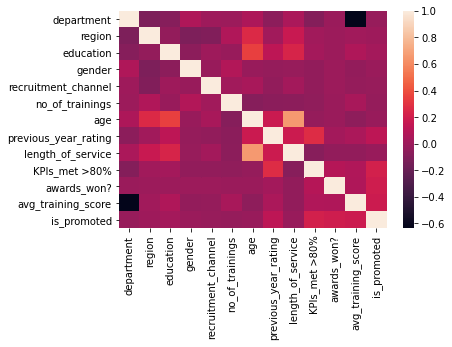

In [ ]:
#Plotting a heatmap to understand the correlation between the variables
sns.heatmap(dataset_eda.corr())

From the above heatmap, it can be observed that Age and Length of Service has high correlation. Only one of these features should be used since multicollinearity undermines statistical significance of an independent variable, Age or length of service in this case.

## **FEATURE ENGINEERING**

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1] #X is the featureset. Dataframe excluding Target Variable (is_promoted)
y = dataset.iloc[:, -1:] #y is the target variable (is_promoted)
#Splitting the dataframe into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.72, random_state = 42)
#Further splitting the test set into validation and testing sets
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, train_size = 0.4, random_state = 42)
#Observing Shapes of the splitted dataframes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)
#Dropping employee_id because all unique values
X_train = X_train.iloc[:, 1:]
X_validation = X_validation.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [ ]:
X_train

From the above Feature Set, employee_id has all unique values. It should be dropped.


There are 5 categories [Deparment, Region, Education, Gender, Recruitment Channel] which has to be encoded.

In [ ]:
#Dropping employee_id because all unique values
X_train = X_train.iloc[:, 1:]
X_validation = X_validation.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

### Department

In [ ]:
#Observing Department
X_train['department'].value_counts()

All values are unique in value counts. So we will perform **frequency encoding** for department categorical variable.

In [ ]:
#Creating the encoding dictionary for department
department_encoder = dict(X_train['department'].value_counts(normalize=True))
department_encoder

In [ ]:
#Mapping the department encoder to all the three sets
X_train['department'] = X_train['department'].map(department_encoder)
X_validation['department'] = X_validation['department'].map(department_encoder)
X_test['department'] = X_test['department'].map(department_encoder)

### Region

In [ ]:
#Observing Region
print(X_train['region'].nunique())
print(X_train['region'].value_counts(normalize = True).nunique())

All values are unique in value counts. So here also, we will perform frequency encoding for Region categorical variable

In [ ]:
#Creating the encoding dictionary for region
region_encoder = dict(X_train['region'].value_counts(normalize=True))
region_encoder

In [ ]:
#Mapping the region encoder to all the three sets
X_train['region'] = X_train['region'].map(region_encoder)
X_validation['region'] = X_validation['region'].map(region_encoder)
X_test['region'] = X_test['region'].map(region_encoder)

### Education

In [ ]:
#Observing Education
X_train['education'].value_counts()

Education has ordinal values. So we will make a custom encoder

In [ ]:
#Creating the encoding dictionary for education
education_encoder = {'Not Defined': 0,
                    'Below Secondary': 1,
                    "Bachelor's": 2,
                    "Master's & above": 3}
education_encoder

In [ ]:
#Mapping the education encoder to all the three sets
X_train['education'] = X_train['education'].map(education_encoder)
X_validation['education'] = X_validation['education'].map(education_encoder)
X_test['education'] = X_test['education'].map(education_encoder)

### Gender

In [ ]:
#Observing Gender
X_train['gender'].value_counts()

Gender has two categories. So, we will encode gender with labelencoder.

In [ ]:
#Creating Encoder for gender (Label Encoder)
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
gender_encoder.fit(X_train['gender'])

In [ ]:
#Transforming the gender with label encoder
X_train['gender'] = gender_encoder.transform(X_train['gender'])
X_validation['gender'] = gender_encoder.transform(X_validation['gender'])
X_test['gender'] = gender_encoder.transform(X_test['gender'])

### Recruitment Channel

In [ ]:
#Observing Recruitment Channel
X_train['recruitment_channel'].value_counts()

All values are unique in value counts. So we will perform frequency encoding for recruitment channel categorical variable.

In [ ]:
#Creating the encoding dictionary for recruitment channel
rc_encoder = dict(X_train['recruitment_channel'].value_counts(normalize=True))
rc_encoder

In [ ]:
#Mapping the recruitment channel encoder to all the three sets
X_train['recruitment_channel'] = X_train['recruitment_channel'].map(rc_encoder)
X_validation['recruitment_channel'] = X_validation['recruitment_channel'].map(rc_encoder)
X_test['recruitment_channel'] = X_test['recruitment_channel'].map(rc_encoder)

## **FEATURE SELECTION**

### pre

In [14]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#Importing Dataset
dataset = pd.read_csv('train.csv')
df = dataset.copy()
#Handling nulls in education (filling it with 'Not Defined')
dataset['education'].fillna(value = 'Not Defined', inplace=True)
#Null imputation in previous_year_rating
dataset.fillna(value=0, inplace = True)
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1] #X is the featureset. Dataframe excluding Target Variable (is_promoted)
y = dataset.iloc[:, -1:] #y is the target variable (is_promoted)
#Splitting the dataframe into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.72, random_state = 42)
#Further splitting the test set into validation and testing sets
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, train_size = 0.4, random_state = 42)
#Observing Shapes of the splitted dataframes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)
#Dropping employee_id because all unique values
X_train = X_train.iloc[:, 1:]
X_validation = X_validation.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]
#Creating the encoding dictionary for department
department_encoder = dict(X_train['department'].value_counts(normalize=True))
department_encoder
#Mapping the department encoder to all the three sets
X_train['department'] = X_train['department'].map(department_encoder)
X_validation['department'] = X_validation['department'].map(department_encoder)
X_test['department'] = X_test['department'].map(department_encoder)
#Creating the encoding dictionary for region
region_encoder = dict(X_train['region'].value_counts(normalize=True))
region_encoder
#Mapping the region encoder to all the three sets
X_train['region'] = X_train['region'].map(region_encoder)
X_validation['region'] = X_validation['region'].map(region_encoder)
X_test['region'] = X_test['region'].map(region_encoder)
#Creating the encoding dictionary for education
education_encoder = {'Not Defined': 0,
                    'Below Secondary': 1,
                    "Bachelor's": 2,
                    "Master's & above": 3}
education_encoder
#Mapping the education encoder to all the three sets
X_train['education'] = X_train['education'].map(education_encoder)
X_validation['education'] = X_validation['education'].map(education_encoder)
X_test['education'] = X_test['education'].map(education_encoder)
#Creating Encoder for gender (Label Encoder)
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
gender_encoder.fit(X_train['gender'])
#Transforming the gender with label encoder
X_train['gender'] = gender_encoder.transform(X_train['gender'])
X_validation['gender'] = gender_encoder.transform(X_validation['gender'])
X_test['gender'] = gender_encoder.transform(X_test['gender'])
#Creating the encoding dictionary for recruitment channel
rc_encoder = dict(X_train['recruitment_channel'].value_counts(normalize=True))
rc_encoder
#Mapping the recruitment channel encoder to all the three sets
X_train['recruitment_channel'] = X_train['recruitment_channel'].map(rc_encoder)
X_validation['recruitment_channel'] = X_validation['recruitment_channel'].map(rc_encoder)
X_test['recruitment_channel'] = X_test['recruitment_channel'].map(rc_encoder)

(39461, 13) (39461, 1)
(9209, 13) (9209, 1)
(6138, 13) (6138, 1)


### Wrapper Methods

The model which we will use for feature selection is **Random Forest Classifier**

In [ ]:
#Importing necessary Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

#### Step Forward Feature Selection

In [ ]:
#Initialising step forward feature selector
sfs_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=42),
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4,
           k_features = 12)

In [ ]:
#Fitting the feature selector and observing features
features_sfs = sfs_feature_selector.fit(X_train, y_train)
pd.DataFrame.from_dict(features_sfs.get_metric_dict()).T

Sfs feature selection suggests **[department, KPI's met, awards won, avg training score]** as features.

In [15]:
X_train_W = X_train.drop(X_train.columns.difference(['department', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']), 1)
X_validation_W = X_validation.drop(X_validation.columns.difference(['department', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']), 1)
X_test_W = X_test.drop(X_test.columns.difference(['department', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']), 1)

In [ ]:
X_train_W

#### Step Backwards Feature Selection

In [ ]:
#Initialising Step Backwards feature selector
sbs_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1, random_state=42),
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [ ]:
#Fitting the step backward feature selector
features_sbs = sbs_feature_selector.fit(X_train, y_train)
pd.DataFrame.from_dict(features_sbs.get_metric_dict()).T

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   47.2s finished

[2021-05-27 13:19:13] Features: 11/1 -- score: 0.8816362924557256[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   45.0s finished

[2021-05-27 13:19:58] Features: 10/1 -- score: 0.8824805387547944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   41.1s finished

[2021-05-27 13:20:40] Features: 9/1 -- score: 0.8802791838489076[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.8830839630055792, 0.881480467406867, 0.8851...",0.880882,"(department, region, education, gender, recrui...",0.006817,0.0042527,0.0024553
11,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.8806134282919965, 0.8866500532656287, 0.885...",0.881636,"(department, region, gender, recruitment_chann...",0.00850687,0.0053069,0.00306394
10,"(0, 1, 3, 5, 6, 7, 8, 9, 10, 11)","[0.8874787215884938, 0.8854666180834926, 0.882...",0.882481,"(department, region, gender, no_of_trainings, ...",0.0078209,0.00487897,0.00281688
9,"(0, 1, 3, 6, 7, 8, 9, 10, 11)","[0.8823377665114956, 0.8859441115035827, 0.879...",0.880279,"(department, region, gender, age, previous_yea...",0.00751522,0.00468827,0.00270678
8,"(0, 1, 3, 6, 7, 8, 9, 11)","[0.8759528477539797, 0.8781015630908566, 0.872...",0.873676,"(department, region, gender, age, previous_yea...",0.00613987,0.00383028,0.00221141
7,"(0, 1, 6, 7, 8, 9, 11)","[0.8719759020975661, 0.8733549575239422, 0.871...",0.869639,"(department, region, age, previous_year_rating...",0.00703486,0.00438861,0.00253376
6,"(0, 1, 6, 7, 9, 11)","[0.8645502800021545, 0.8661894374738967, 0.862...",0.861577,"(department, region, age, previous_year_rating...",0.00815591,0.00508796,0.00293754
5,"(0, 1, 6, 9, 11)","[0.8490445401040054, 0.8555834178211017, 0.840...",0.845004,"(department, region, age, KPIs_met >80%, avg_t...",0.0126642,0.00790039,0.00456129
4,"(0, 1, 9, 11)","[0.8518321012459755, 0.8399100163032589, 0.851...",0.847506,"(department, region, KPIs_met >80%, avg_traini...",0.00781355,0.00487439,0.00281423
3,"(0, 9, 11)","[0.8887391044473908, 0.8802592173967962, 0.876...",0.881116,"(department, KPIs_met >80%, avg_training_score)",0.00732466,0.0045694,0.00263814


Sbs feature selection suggests we take 10 features. **[department, KPI's, avg training score]** are good features according to both sbs and sfs. 

### Embedded Methods

#### Random Forest Feature Importance

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    5.0s finished


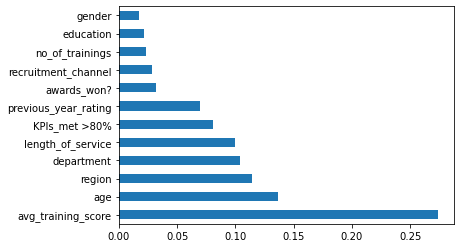

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42, verbose = 1, n_estimators=200, criterion='entropy', max_features=2)
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

From the above plot, **[gender, education, no of trainings, recruitment channel, awards won]** aren't considered good features. Rest all are acceptable.

In [16]:
#Creating a featureset based on these
X_trainF = X_train.drop(columns=['gender', 'education', 'no_of_trainings', 'recruitment_channel', 'awards_won?'], axis=1)
X_validationF = X_validation.drop(columns=['gender', 'education', 'no_of_trainings', 'recruitment_channel', 'awards_won?'], axis=1)
X_testF = X_test.drop(columns=['gender', 'education', 'no_of_trainings', 'recruitment_channel', 'awards_won?'], axis=1)

In [ ]:
X_trainF

## **MODEL TRAINING**

### Importing Libraries

In [17]:
#Importing necessary Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

### **With WRAPPER method suggested features**

#### Logistic Regression Classifier

In [ ]:
#Fitting Logistic Regression in training Set
classifier = LogisticRegression()
classifier.fit(X_train_W, y_train)

LogisticRegression()

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8433   30]
 [ 665   81]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8463
           1       0.73      0.11      0.19       746

    accuracy                           0.92      9209
   macro avg       0.83      0.55      0.57      9209
weighted avg       0.91      0.92      0.90      9209



#### KNN Classifier

In [ ]:
#Fitting KNN to the training Set
classifier = KNeighborsClassifier()
classifier.fit(X_train_W, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8376   87]
 [ 487  259]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8463
           1       0.75      0.35      0.47       746

    accuracy                           0.94      9209
   macro avg       0.85      0.67      0.72      9209
weighted avg       0.93      0.94      0.93      9209



#### SVM Classifier

##### Linear Kernel

In [ ]:
# Fitting Linear Kernel SVM to the Training Set
classifier = SVC(kernel = 'linear')
classifier.fit(X_train_W, y_train)

SVC(kernel='linear')

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



##### Gaussian Kernel

In [ ]:
# Fitting Gaussian Kernel SVM to the Training Set
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_W, y_train)

SVC()

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



##### Poly Kernel

In [ ]:
# Fitting Gaussian Kernel SVM to the Training Set
classifier = SVC(kernel = 'poly')
classifier.fit(X_train_W, y_train)

SVC(kernel='poly')

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_test_W)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



#### Decision Tree Classifier

In [ ]:
# Fitting Decision Tree Classifier to the Training Set
classifier = DecisionTreeClassifier()
classifier.fit(X_train_W, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_test_W)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8439   24]
 [ 493  253]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.91      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.93      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



#### Random Forest Classifier

In [ ]:
#Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_W, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_test_W)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8432   31]
 [ 492  254]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.89      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.92      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



#### XGBoost Classifier

In [ ]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(X_train_W, y_train)

[11:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_test_W)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8439   24]
 [ 491  255]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8463
           1       0.91      0.34      0.50       746

    accuracy                           0.94      9209
   macro avg       0.93      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



### **With EMBEDDED suggested features**

#### Logistic Regression Classifier

In [ ]:
#Fitting Logistic Regression in training Set
classifier = LogisticRegression()
classifier.fit(X_trainF, y_train)

LogisticRegression()

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 679   67]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8463
           1       1.00      0.09      0.16       746

    accuracy                           0.93      9209
   macro avg       0.96      0.54      0.56      9209
weighted avg       0.93      0.93      0.90      9209



#### KNN Classifier

In [ ]:
#Fitting KNN to the training Set
classifier = KNeighborsClassifier()
classifier.fit(X_trainF, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8364   99]
 [ 637  109]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8463
           1       0.52      0.15      0.23       746

    accuracy                           0.92      9209
   macro avg       0.73      0.57      0.59      9209
weighted avg       0.90      0.92      0.90      9209



#### SVM Classifier

##### Linear kernel

In [ ]:
# Fitting Linear Kernel SVM to the Training Set
classifier = SVC(kernel = 'linear')
classifier.fit(X_trainF, y_train)

SVC(kernel='linear')

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



##### Gaussian Kernel

In [ ]:
# Fitting Gaussian Kernel SVM to the Training Set
classifier = SVC(kernel = 'rbf')
classifier.fit(X_trainF, y_train)

SVC()

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



##### Poly Kernel

In [ ]:
# Fitting Gaussian Kernel SVM to the Training Set
classifier = SVC(kernel = 'poly')
classifier.fit(X_trainF, y_train)

SVC(kernel='poly')

In [ ]:
#Predicting Test Set Results
y_pred = classifier.predict(X_testF)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8463    0]
 [ 746    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8463
           1       0.00      0.00      0.00       746

    accuracy                           0.92      9209
   macro avg       0.46      0.50      0.48      9209
weighted avg       0.84      0.92      0.88      9209



#### Decision Tree Classifier

In [ ]:
# Fitting Decision Tree Classifier to the Training Set
classifier = DecisionTreeClassifier()
classifier.fit(X_trainF, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_testF)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7929  534]
 [ 420  326]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8463
           1       0.38      0.44      0.41       746

    accuracy                           0.90      9209
   macro avg       0.66      0.69      0.67      9209
weighted avg       0.90      0.90      0.90      9209



#### Random Forest Classifier

In [ ]:
#Fitting Random Forest Classifier to the Training Set
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_trainF, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_testF)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8376   87]
 [ 507  239]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8463
           1       0.73      0.32      0.45       746

    accuracy                           0.94      9209
   macro avg       0.84      0.66      0.71      9209
weighted avg       0.93      0.94      0.92      9209



#### XGBoost Classifier

In [ ]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(X_trainF, y_train)

[10:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# Predicting the Test Set Results
y_pred = classifier.predict(X_testF)

In [ ]:
#Checking Accuracies
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8431   32]
 [ 492  254]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.89      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.92      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



### **INFERENCE** 

Based on all the Model Scores, **Random Forest** and **XGBoost** performs very good on both the subset of features (**Wrapper** suggested & **Embedded** suggested). So, we will focus on these models and try to make them perform even better with hyper-parameter tuning.

## **HYPER-PARAMETER TUNING**

### **Wrapper** suggested Features

#### Random Forest

##### Default Parameters

In [18]:
#Fitting Random Forest Classifier with default parameters to the Training Set
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_W, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
#Checking Training Accuracy
y_pred = classifier.predict(X_train_W)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[35989    54]
 [ 2194  1224]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.96      0.36      0.52      3418

    accuracy                           0.94     39461
   macro avg       0.95      0.68      0.75     39461
weighted avg       0.94      0.94      0.93     39461



In [20]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validation_W)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5613   21]
 [ 318  186]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.90      0.37      0.52       504

    accuracy                           0.94      6138
   macro avg       0.92      0.68      0.75      6138
weighted avg       0.94      0.94      0.93      6138



In [21]:
#Checking test Accuracy
y_pred = classifier.predict(X_test_W)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8432   31]
 [ 492  254]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.89      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.92      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



##### Grid Search Cross Validation

In [22]:
#Importing Grid Search Cross Validation and roc auc scoring metric
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [23]:
#Making a matrix of hyperparameters
parameters = [{'n_estimators': [10, 50, 75, 100, 200, 300, 400],
               'max_depth': [1,2,3,4,5, None],
               'min_samples_split': [2, 3],
               'min_samples_leaf': [1, 2],
               'max_leaf_nodes': [1, 2, None]}]

parameters

[{'max_depth': [1, 2, 3, 4, 5, None],
  'max_leaf_nodes': [1, 2, None],
  'min_samples_leaf': [1, 2],
  'min_samples_split': [2, 3],
  'n_estimators': [10, 50, 75, 100, 200, 300, 400]}]

In [24]:
#Fitting grid search CV with the validation set
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', n_jobs=-1)
grid_search = grid_search.fit(X_validation_W, y_validation)

In [25]:
#Observing roc_auc score (higher the better)
grid_search.best_score_

0.8821157396922858

In [26]:
#Finding the best hyperparameters
grid_search.best_params_

{'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

##### NEW HYPER-PARAMETERS

In [27]:
#Fitting Random Forest Classifier to the Training Set with new hyperparameters
classifier = RandomForestClassifier(random_state=42, n_estimators = 200, min_samples_leaf=2, min_samples_split=2)
classifier.fit(X_train_W, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
#Checking Training Accuracy
y_pred = classifier.predict(X_train_W)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[35993    50]
 [ 2204  1214]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.96      0.36      0.52      3418

    accuracy                           0.94     39461
   macro avg       0.95      0.68      0.74     39461
weighted avg       0.94      0.94      0.93     39461



In [29]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validation_W)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5615   19]
 [ 318  186]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.91      0.37      0.52       504

    accuracy                           0.95      6138
   macro avg       0.93      0.68      0.75      6138
weighted avg       0.94      0.95      0.93      6138



In [30]:
#Checking test Accuracy
y_pred = classifier.predict(X_test_W)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8435   28]
 [ 494  252]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.90      0.34      0.49       746

    accuracy                           0.94      9209
   macro avg       0.92      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



#### XGBoost

##### Default Parameters

In [ ]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(X_train_W, y_train)

[20:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Checking Training Accuracy
y_pred = classifier.predict(X_train_W)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[35997    46]
 [ 2207  1211]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.96      0.35      0.52      3418

    accuracy                           0.94     39461
   macro avg       0.95      0.68      0.74     39461
weighted avg       0.94      0.94      0.93     39461



In [ ]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validation_W)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5615   19]
 [ 318  186]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.91      0.37      0.52       504

    accuracy                           0.95      6138
   macro avg       0.93      0.68      0.75      6138
weighted avg       0.94      0.95      0.93      6138



In [ ]:
#Checking test Accuracy
y_pred = classifier.predict(X_test_W)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8439   24]
 [ 491  255]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8463
           1       0.91      0.34      0.50       746

    accuracy                           0.94      9209
   macro avg       0.93      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



##### Grid Search Cross Validation

In [ ]:
#Importing Grid Search Cross Validation and roc auc scoring metric
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [ ]:
#Making a matrix of hyperparameters
parameters = [{'learning_rate': [0.1, 0.2, 0.3, 0.4],
                'n_estimators': [10, 50, 75, 100, 150, 200 , 300, 400],
               'gamma': [0, 0.1, 0.2, 0.3, 0.4]}]

parameters

[{'learning_rate': [0.1, 0.2, 0.3, 0.4],
  'n_estimators': [10, 50, 75, 100, 150, 200, 300, 400],
  'gamma': [0, 0.1, 0.2, 0.3, 0.4]}]

In [ ]:
#Fitting grid search CV with the validation set
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', n_jobs=-1)
grid_search = grid_search.fit(X_validation_W, y_validation)

[22:37:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
#Observing roc_auc score (higher the better)
grid_search.best_score_

0.8868488462618345

In [ ]:
#Finding the best hyperparameters
grid_search.best_params_

{'gamma': 0.3, 'learning_rate': 0.3, 'n_estimators': 150}

##### NEW HYPER-PARAMETERS

In [ ]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier(learning_rate=0.3, n_estimators=150, max_depth=4,
                      gamma=0.3)
classifier.fit(X_train_W, y_train)

[22:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Checking Training Accuracy
y_pred = classifier.predict(X_train_W)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[35997    46]
 [ 2225  1193]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.96      0.35      0.51      3418

    accuracy                           0.94     39461
   macro avg       0.95      0.67      0.74     39461
weighted avg       0.94      0.94      0.93     39461



In [ ]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validation_W)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5618   16]
 [ 317  187]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5634
           1       0.92      0.37      0.53       504

    accuracy                           0.95      6138
   macro avg       0.93      0.68      0.75      6138
weighted avg       0.94      0.95      0.93      6138



In [ ]:
#Checking test Accuracy
y_pred = classifier.predict(X_test_W)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8444   19]
 [ 493  253]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.93      0.34      0.50       746

    accuracy                           0.94      9209
   macro avg       0.94      0.67      0.73      9209
weighted avg       0.94      0.94      0.93      9209



### **Embedded** suggested Features

#### Random Forest

##### Default Parameters

In [7]:
#Fitting Random Forest Classifier with default parameters to the Training Set
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_trainF, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [8]:
#Checking Training Accuracy
y_pred = classifier.predict(X_trainF)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[36022    21]
 [   77  3341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36043
           1       0.99      0.98      0.99      3418

    accuracy                           1.00     39461
   macro avg       1.00      0.99      0.99     39461
weighted avg       1.00      1.00      1.00     39461



In [9]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validationF)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5577   57]
 [ 341  163]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5634
           1       0.74      0.32      0.45       504

    accuracy                           0.94      6138
   macro avg       0.84      0.66      0.71      6138
weighted avg       0.93      0.94      0.92      6138



In [10]:
#Checking test Accuracy
y_pred = classifier.predict(X_testF)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8376   87]
 [ 507  239]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8463
           1       0.73      0.32      0.45       746

    accuracy                           0.94      9209
   macro avg       0.84      0.66      0.71      9209
weighted avg       0.93      0.94      0.92      9209



##### Grid Search Cross Validation

In [11]:
#Importing Grid Search Cross Validation and roc auc scoring metric
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [31]:
#Making a matrix of hyperparameters
parameters = [{'n_estimators': [10, 50, 75, 100, 200, 300],
               'max_depth': [1,2,3,4,5, None],
               'min_samples_split': [2, 3],
               'min_samples_leaf': [1, 2],
               'max_leaf_nodes': [1, 2, None]}]

parameters

[{'max_depth': [1, 2, 3, 4, 5, None],
  'max_leaf_nodes': [1, 2, None],
  'min_samples_leaf': [1, 2],
  'min_samples_split': [2, 3],
  'n_estimators': [10, 50, 75, 100, 200, 300]}]

In [32]:
#Fitting grid search CV with the validation set
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', n_jobs=-1)
grid_search = grid_search.fit(X_validationF, y_validation)

In [33]:
#Observing roc_auc score (higher the better)
grid_search.best_score_

0.8719898238111836

In [34]:
#Finding the best hyperparameters
grid_search.best_params_

{'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

##### NEW HYPER-PARAMETERS

In [35]:
#Fitting Random Forest Classifier to the Training Set with new hyperparameters
classifier = RandomForestClassifier(random_state=42, n_estimators = 300, min_samples_leaf=1, min_samples_split=3)
classifier.fit(X_trainF, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
#Checking Training Accuracy
y_pred = classifier.predict(X_trainF)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[36035     8]
 [  354  3064]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     36043
           1       1.00      0.90      0.94      3418

    accuracy                           0.99     39461
   macro avg       0.99      0.95      0.97     39461
weighted avg       0.99      0.99      0.99     39461



In [37]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validationF)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5594   40]
 [ 344  160]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5634
           1       0.80      0.32      0.45       504

    accuracy                           0.94      6138
   macro avg       0.87      0.66      0.71      6138
weighted avg       0.93      0.94      0.92      6138



In [38]:
#Checking test Accuracy
y_pred = classifier.predict(X_testF)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8412   51]
 [ 514  232]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8463
           1       0.82      0.31      0.45       746

    accuracy                           0.94      9209
   macro avg       0.88      0.65      0.71      9209
weighted avg       0.93      0.94      0.93      9209



#### XGBoost

##### Default Parameters

In [39]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier()
classifier.fit(X_trainF, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
#Checking Training Accuracy
y_pred = classifier.predict(X_trainF)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[36023    20]
 [ 2440   978]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.98      0.29      0.44      3418

    accuracy                           0.94     39461
   macro avg       0.96      0.64      0.70     39461
weighted avg       0.94      0.94      0.92     39461



In [41]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validationF)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5627    7]
 [ 352  152]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5634
           1       0.96      0.30      0.46       504

    accuracy                           0.94      6138
   macro avg       0.95      0.65      0.71      6138
weighted avg       0.94      0.94      0.93      6138



In [42]:
#Checking test Accuracy
y_pred = classifier.predict(X_testF)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8456    7]
 [ 530  216]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.97      0.29      0.45       746

    accuracy                           0.94      9209
   macro avg       0.95      0.64      0.71      9209
weighted avg       0.94      0.94      0.93      9209



##### Grid Search Cross Validation

In [43]:
#Importing Grid Search Cross Validation and roc auc scoring metric
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [44]:
#Making a matrix of hyperparameters
parameters = [{'learning_rate': [0.1, 0.2, 0.3, 0.4],
                'n_estimators': [10, 50, 75, 100, 150, 200 , 300, 400],
               'gamma': [0, 0.1, 0.2, 0.3, 0.4]}]

parameters

[{'gamma': [0, 0.1, 0.2, 0.3, 0.4],
  'learning_rate': [0.1, 0.2, 0.3, 0.4],
  'n_estimators': [10, 50, 75, 100, 150, 200, 300, 400]}]

In [45]:
#Fitting grid search CV with the validation set
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', n_jobs=-1)
grid_search = grid_search.fit(X_validationF, y_validation)

In [46]:
#Observing roc_auc score (higher the better)
grid_search.best_score_

0.8889617684285808

In [47]:
#Finding the best hyperparameters
grid_search.best_params_

{'gamma': 0.2, 'learning_rate': 0.1, 'n_estimators': 200}

##### NEW HYPER-PARAMETERS

In [48]:
# Fitting XGBoost to the Training Set
classifier = XGBClassifier(learning_rate=0.1, n_estimators=200, gamma=0.2)
classifier.fit(X_trainF, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [49]:
#Checking Training Accuracy
y_pred = classifier.predict(X_trainF)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[36011    32]
 [ 2307  1111]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36043
           1       0.97      0.33      0.49      3418

    accuracy                           0.94     39461
   macro avg       0.96      0.66      0.73     39461
weighted avg       0.94      0.94      0.93     39461



In [50]:
#Checking Validation Accuracy
y_pred = classifier.predict(X_validationF)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

[[5626    8]
 [ 332  172]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5634
           1       0.96      0.34      0.50       504

    accuracy                           0.94      6138
   macro avg       0.95      0.67      0.74      6138
weighted avg       0.95      0.94      0.93      6138



In [51]:
#Checking test Accuracy
y_pred = classifier.predict(X_testF)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8454    9]
 [ 503  243]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8463
           1       0.96      0.33      0.49       746

    accuracy                           0.94      9209
   macro avg       0.95      0.66      0.73      9209
weighted avg       0.95      0.94      0.93      9209

